# Simple Neural Network from scratch
In this Notebook I will be exploring basic techniques like Gradint Descent, Non-linear activations, Chain rule in order to enable a NN model to learn on MNIST DATASET

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Let's first download and parse our data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float')
x_train /= 255
y_train = to_categorical(y_train)

train_samples = 5000

x_train = x_train[0:train_samples]
y_train = y_train[0:train_samples]

x_test = x_test.astype('float')
x_test /= 255
y_test = to_categorical(y_test)

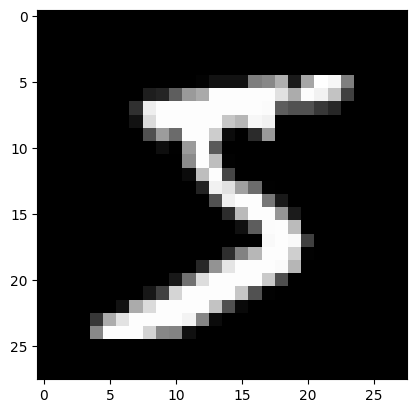

In [2]:
from matplotlib import pyplot as plt

# Here is a sample of our dataset
def show_img(sample):
    img = sample.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(img, interpolation='nearest')
    plt.show()

show_img(x_train[0])

## API
In this repository I implemented a simple API for creating and interacting with the model. A model class represents a sequential NN model, it supports the following:
* Model initialization
* Choosing error functions for the model
* Adding layers
* Choosing input shapes and activation functions
* Fitting and predicting

In [3]:
from toy_autograd_new.model import Model, LayersEnum, ActivationEnum, ErrorEnum

output_dim = 10

# Here we formulate the model itself

# The output dimension is defined by the number of classes
# (10 numbers from 0 to 9)

model = Model(ErrorEnum.mean_square)
model.add_layer(LayersEnum.flatten, input_shape=(28, 28))
model.add_layer(LayersEnum.fully_connected, num_units=64, activation=ActivationEnum.tanh)
model.add_layer(LayersEnum.fully_connected, num_units=64, activation=ActivationEnum.tanh),
model.add_layer(LayersEnum.fully_connected, num_units=64, activation=ActivationEnum.tanh),
model.add_layer(LayersEnum.fully_connected, num_units=output_dim)
model.add_layer(LayersEnum.softmax, input_shape=(output_dim, 1))

# The summarization feature of the model
model.summary()

FlattenLayer: input - (28, 28); output - (1, 784)
FC: input - (784, 64); output - (1, 64)
Activation: input - (1, 64); output - (1, 64)
FC: input - (64, 64); output - (1, 64)
Activation: input - (1, 64); output - (1, 64)
FC: input - (64, 64); output - (1, 64)
Activation: input - (1, 64); output - (1, 64)
FC: input - (64, 10); output - (1, 10)
SoftmaxLayer: input - (10, 1); output - (1, 10)


In [4]:
# Let it learn!
model.fit(x_train, y_train, num_epochs=40, learning_rate=0.05)

10/40, error=0.06280294434895906
20/40, error=0.03899662088156298
30/40, error=0.026678890942604477
40/40, error=0.019090517812611806


True: 5; Pred: 5; Conf: 0.9999745317407519


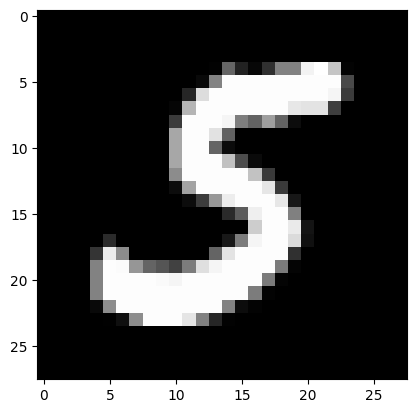

True: 0; Pred: 0; Conf: 0.9999998261383716


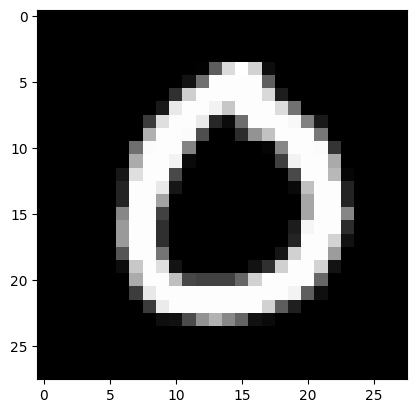

True: 0; Pred: 0; Conf: 0.9964634131083958


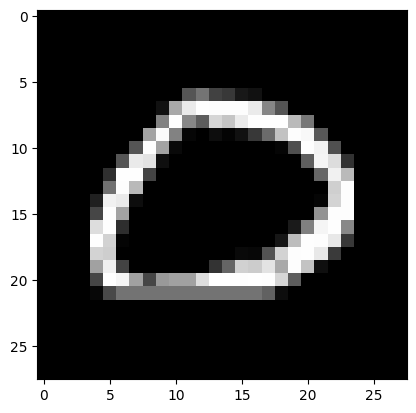

In [5]:
import numpy as np

# Finally lets look at the prediction results and see,
# if our model has learned something

def evaluate(num_tries, X, Y, pred):
    for _ in range(num_tries):
        rand_index = np.random.randint(Y.shape[0])
        real_value = np.argmax(Y[rand_index])
        predicted_value = pred(X[rand_index])[0]
        predicted_idx = np.argmax(predicted_value)
        print(f"True: {real_value}; Pred: {predicted_idx}; Conf: {predicted_value[predicted_idx]}")
        show_img(x_test[rand_index])


evaluate(3, x_test, y_test, model.forward)

Great! The model is capable of accurately recognize the handwritten digits